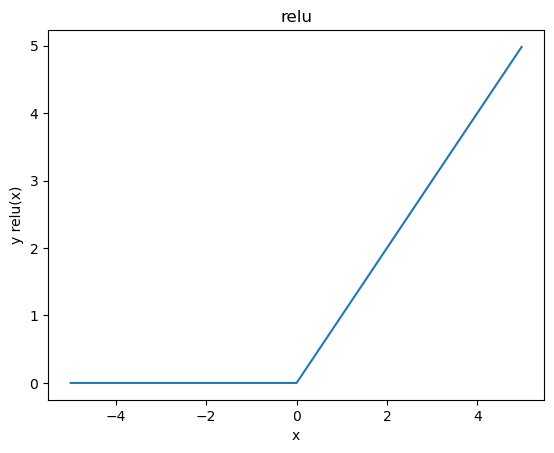

In [12]:
import numpy as np
import matplotlib.pyplot as plt
def relu(x):
    if x > 0:
        return x
    else:
        return 0

def func4():
    x = np.arange(-5.0, 5.0, 0.02)
    y = []
    for i in x:
        yi = relu(i)
        y.append(yi)
    plt.xlabel('x')
    plt.ylabel('y relu(x)')
    plt.title('relu')
    plt.plot(x, y)
    plt.show()

func4()
 


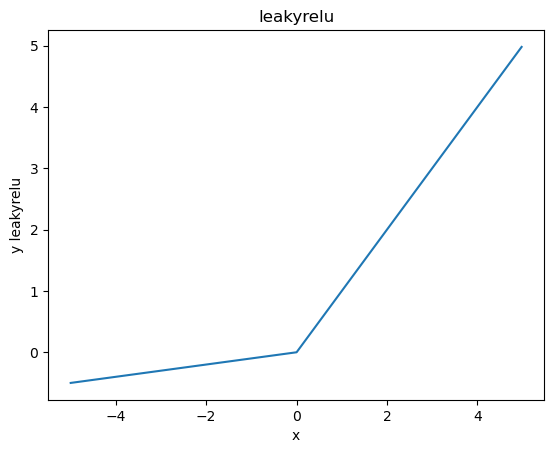

In [13]:
def leakrelu(x):
    if x > 0:
        return x
    else:
        return x * 0.1

def func5():
    x = np.arange(-5.0, 5.0, 0.02)
    y = []
    for i in x:
        yi = leakrelu(i)
        y.append(yi)
    plt.xlabel('x')
    plt.ylabel('y leakyrelu')
    plt.title('leakyrelu')
    plt.plot(x, y)
    plt.show()

func5()

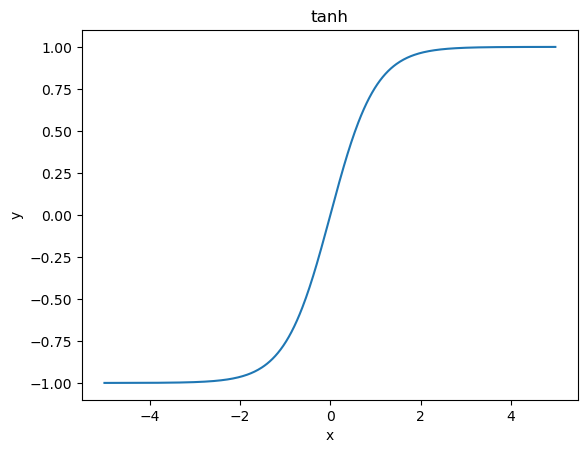

In [14]:
x = np.arange(-5.0, 5.0, 0.02)
y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('tanh')
plt.plot(x, y)
plt.show()

In [15]:
def demo():
    import random
    a = 0.1
    x = random.randint(1, 10)
    y = x * x + 2
    index = 1
    while index < 100 and abs(y-2) > 0.01:
        y = x * x + 2
        print("batch={} x={} y={}".format(index, x, y))
        x = x - 2*x*a
        index += 1
demo() 


batch=1 x=5 y=27
batch=2 x=4.0 y=18.0
batch=3 x=3.2 y=12.240000000000002
batch=4 x=2.56 y=8.5536
batch=5 x=2.048 y=6.194304
batch=6 x=1.6384 y=4.68435456
batch=7 x=1.31072 y=3.7179869184000003
batch=8 x=1.0485760000000002 y=3.0995116277760006
batch=9 x=0.8388608000000002 y=2.7036874417766406
batch=10 x=0.6710886400000001 y=2.45035996273705
batch=11 x=0.5368709120000001 y=2.288230376151712
batch=12 x=0.4294967296000001 y=2.1844674407370954
batch=13 x=0.3435973836800001 y=2.118059162071741
batch=14 x=0.27487790694400005 y=2.075557863725914
batch=15 x=0.21990232555520003 y=2.048357032784585
batch=16 x=0.17592186044416003 y=2.0309485009821344
batch=17 x=0.140737488355328 y=2.019807040628566
batch=18 x=0.11258999068426241 y=2.012676506002282
batch=19 x=0.09007199254740993 y=2.0081129638414605


## 1.3 基于CNN的图像分类
1. 局部连接
2. 参数共享
3. 池化
4. 典型结构
5. AlexNet, VGG, ResNet, Inception

## 1.4 常见性能衡量指标
1. 测试数据


In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x, y = datasets.make_classification(n_samples=1000, n_features=100,
                                    n_redundant=0, random_state=1)

train_X, test_X, train_y, test_Y = train_test_split(x, y, test_size=0.2, random_state=66)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y)
pred_Y = knn.predict(test_X)

2. 混淆矩阵(Confusion Matrix)


In [17]:
from sklearn import metrics
print(f'confusion_matrix{metrics.confusion_matrix(test_Y, pred_Y)}')

confusion_matrix[[70 25]
 [36 69]]


3. 准确率和召回率（Recall Rate, Precision Rate）

In [18]:
print('recall_score')
print(metrics.recall_score(test_Y, pred_Y))
print('precision_score')
print(metrics.precision_score(test_Y, pred_Y))

recall_score
0.6571428571428571
precision_score
0.7340425531914894


4. 准确度（Accuracy）与F1_score

In [19]:
print('Accuracy Score')
print(metrics.accuracy_score(test_Y, pred_Y))
print('f1_score')
print(metrics.f1_score(test_Y, pred_Y))

Accuracy Score
0.695
f1_score
0.6934673366834171


5. ROC 与 AUC（receiver operating characteristic, area under the reciever operating characteristic）

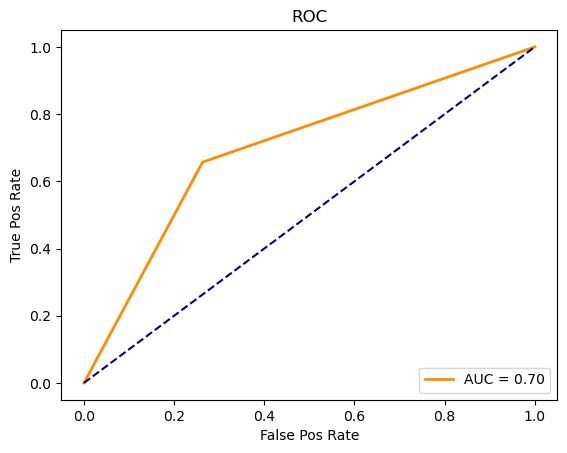

In [ ]:
b

In [21]:
print('AUC')
print(metrics.roc_auc_score(test_Y, pred_Y))

AUC
0.6969924812030075


## 1.5 集成学习


In [ ]:
# Boosting
from sklearn.ensemble import AdaBoostClassifier
x, y = datasets.make_classification(n_samples=1000, n_features=100, n_redundant=0, random_state=1)
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size=0.2, random_state=66)

clf = AdaBoostClassifier(n_estimators=100)
clf.fit(train_X, train_Y)
pred_Y = clf.predict(test_X)

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
x, y = datasets.make_classification(n_samples=1000, n_features=100, n_redundant=0, random_state=1)
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size=0.2, random_state=66)

clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(train_X, train_y)
clf.predict(test_X)
print(classification_report(test_Y, pred_Y))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78        95
           1       0.80      0.83      0.81       105

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



In [ ]:
# Bagging
from sklearn.ensemble import BaggingClassifier
x, y = datasets.make_classification(n_samples=1000, n_features=100, n_redundant=0, random_state=1)
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size=0.2, random_state=66)
clf = BaggingClassifier(n_estimators=100)
clf.fit(train_X, train_Y)
pred_Y = clf.predict(test_X)
print(classification_report(test_Y, pred_Y))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        95
           1       0.85      0.87      0.86       105

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

